In [1]:
cd ..

C:\Users\Sommer Lab\Documents\Analysis Code


In [42]:
import sys
# sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.integrate import simpson

from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy import ndimage
from skimage.filters import threshold_otsu

In [216]:
def ImgShow(imgs):
    imgNo = len(imgs)
    fig, axs = plt.subplots(imgNo,1, figsize=(5,4*imgNo))
    for ii, img in enumerate(imgs):
        axs[ii].imshow(img)
        
def Plot(imgs):
    imgNo = len(imgs)
    fig, axs = plt.subplots(imgNo,1, figsize=(5,4*imgNo))
    for ii, img in enumerate(imgs):
        axs[ii].plot(img.mean(axis=1))
        
def PlotOverlap(imgs):
    imgNo = len(imgs)
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    for ii, img in enumerate(imgs):
        ax.plot(img.mean(axis=1), label=str(ii))
    plt.legend()
    
def Normalize(imgs):
    if type(imgs) is not list: imgs = [imgs]
    imgsNorm = []
    for ii, img in enumerate(imgs):
        img = img - img.min()
        imgsNorm.append(img / img.max())
    return imgsNorm

7.18.2023  
ODT align side image.  
C:\Users\Sommer Lab\Documents\Data\2023\07-2023\18 Jul 2023\Andor\odt align


In [17]:
plt.rcParams['image.cmap'] = 'gray'

In [201]:
imgs = np.load('Applications\imgs.npy')

In [198]:
# #Normalize the pictures
# for ii, img in enumerate(imgs):
#     img = img - img.min()
#     imgs[ii] = img / img.max()

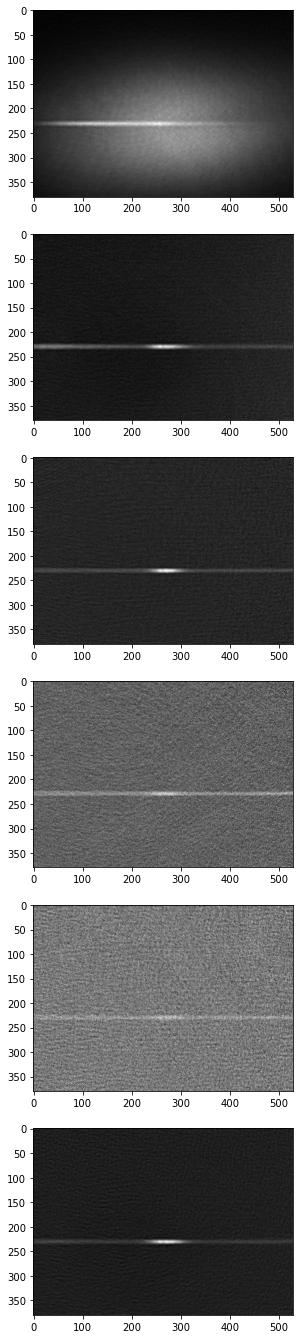

In [202]:
ImgShow(imgs)
    

In [203]:
img0 = imgs[0].copy()

In [204]:
sigma = 10
img0gf = ndimage.gaussian_filter(img0, sigma)
img0uf = ndimage.uniform_filter(img0, sigma*2.5)

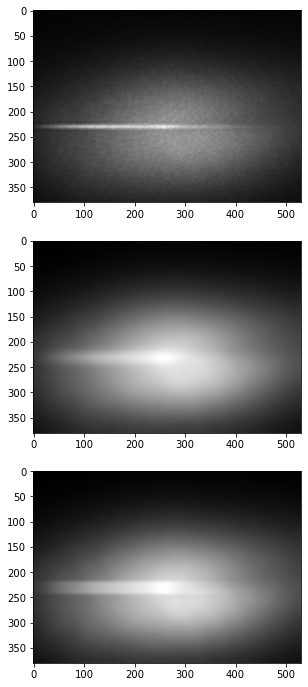

In [205]:
ImgShow([img0, img0gf, img0uf])

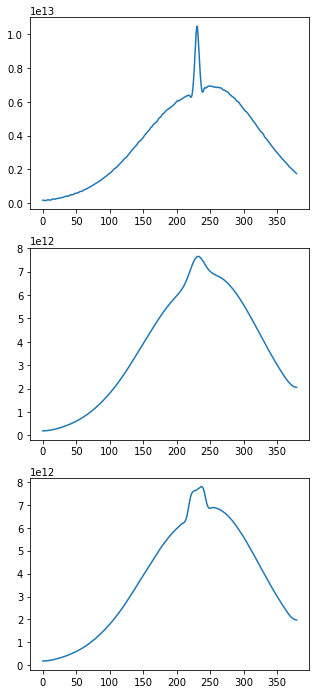

In [217]:
Plot([img0, img0gf, img0uf])

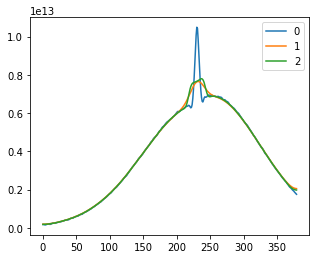

In [218]:
PlotOverlap([img0, img0gf, img0uf])

In [227]:
diffgf = img0 - img0gf
diffuf = img0 - img0uf

# diffgf, diffuf = Normalize([diffgf, diffuf])

In [228]:
img

array([[7.30425756e+11, 8.31650211e+11, 9.21398195e+11, ...,
        5.73281315e+11, 8.57325587e+11, 1.03310650e+12],
       [8.34798712e+11, 1.07281614e+12, 9.37208643e+11, ...,
        6.92699498e+11, 8.66289070e+11, 1.18340179e+12],
       [7.62541547e+11, 9.54959245e+11, 1.03956772e+12, ...,
        5.30248686e+11, 8.57021664e+11, 1.04145540e+12],
       ...,
       [5.95577112e+11, 7.41047221e+11, 5.63261376e+11, ...,
        8.14701106e+11, 9.94019357e+11, 1.00196202e+12],
       [9.23111128e+11, 1.06472359e+12, 1.03173238e+12, ...,
        6.63000540e+11, 9.87241918e+11, 8.86675744e+11],
       [8.14677033e+11, 9.65698125e+11, 8.66749032e+11, ...,
        5.52608667e+11, 7.26097501e+11, 9.44576707e+11]])

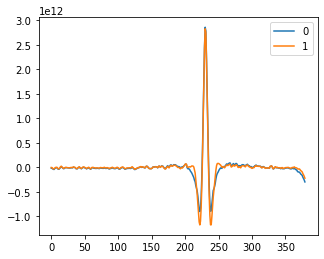

In [229]:
PlotOverlap([diffgf, diffuf])

In [230]:
diffgf.max()

7302095977392.143

In [212]:
img0[220:235, :3]

array([[2.38397605e+12, 2.47713138e+12, 2.22493926e+12],
       [2.18692116e+12, 2.16741244e+12, 2.14668682e+12],
       [2.06718022e+12, 2.26048028e+12, 2.20016302e+12],
       [2.20236756e+12, 2.13922057e+12, 2.35616421e+12],
       [2.29812419e+12, 2.29416208e+12, 2.20286768e+12],
       [2.33724554e+12, 2.44772817e+12, 2.45900435e+12],
       [2.43327862e+12, 2.74573696e+12, 2.62895345e+12],
       [2.88060486e+12, 2.79907212e+12, 2.83017174e+12],
       [2.73610132e+12, 3.00338455e+12, 3.02115779e+12],
       [3.23207015e+12, 3.21634254e+12, 3.11132237e+12],
       [3.49755935e+12, 3.63959203e+12, 3.49044085e+12],
       [3.43497853e+12, 3.49990295e+12, 3.39074990e+12],
       [3.14844448e+12, 3.29256832e+12, 3.27255883e+12],
       [3.05381837e+12, 2.94036374e+12, 2.90276091e+12],
       [2.76029909e+12, 2.78429814e+12, 2.68562183e+12]])

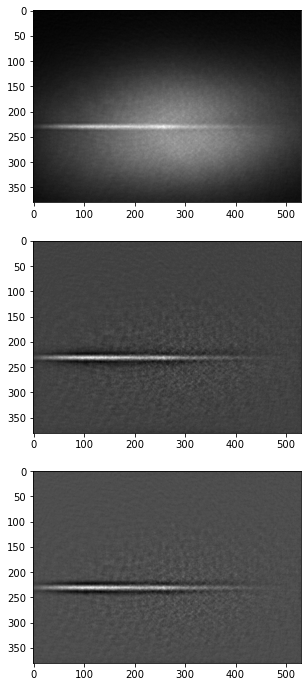

In [231]:
ImgShow([img0, diffgf, diffuf])

In [232]:
thrgf = threshold_otsu(diffgf)
thruf = threshold_otsu(diffuf)

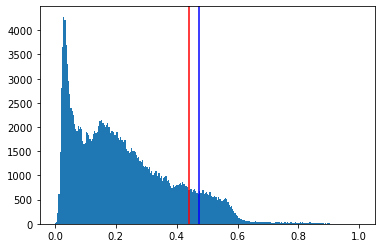

In [191]:
plt.hist(img0.flatten(), bins=256)
plt.axvline(thrgf, c='r')
plt.axvline(thruf, c='b')

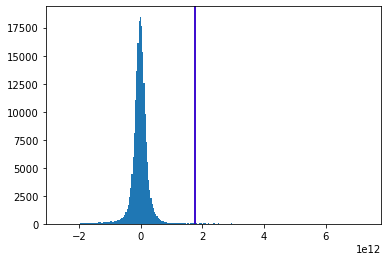

In [233]:
plt.hist(diffgf.flatten(), bins=256)
plt.axvline(thrgf, c='r')
plt.axvline(thruf, c='b')

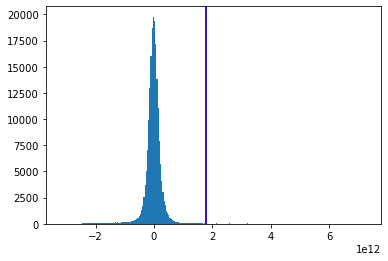

In [234]:
plt.hist(diffuf.flatten(), bins=256)
plt.axvline(thrgf, c='r')
plt.axvline(thruf, c='b')

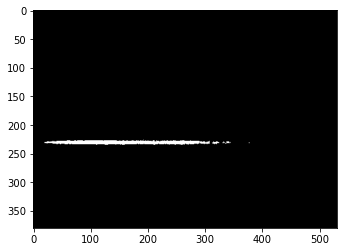

In [238]:
plt.imshow(diffuf>thruf)

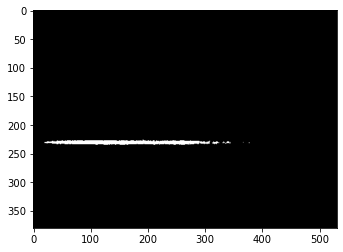

In [239]:
plt.imshow(diffgf>thrgf)

In [242]:
sigma = 10

img0_1D = img0.mean(1)
img0_1Duf = ndimage.uniform_filter1d(img0_1D, sigma*2)
img0_1Dgf = ndimage.gaussian_filter1d(img0_1D, sigma)

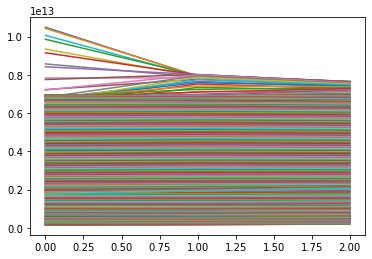

In [244]:
plt.plot([img0_1D, img0_1Duf, img0_1Dgf])

In [87]:
type([img0_1D]) is list

True

In [89]:
if 1:print('asdf')

asdf


In [ ]:
def gauss(x, mu, sigma):
    return np.exp( -(x-mu)**2 / (2*sigma)**2 )
    